Social coupling: mental health effect of COVID-19 measures
====

This notebook revolves around the analysis of data on the social and mental effect of the (Belgian) government COVID-19 measures.

## Tools

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

## PROMIS data mental health
In this section, the investigation is on mental health data, in [PROMIS scale](http://www.healthmeasures.net/score-and-interpret/interpret-scores/promis/reference-populations), that was gathered during the lockdown by Melanie Beeckman and colleagues.

An overview of the questionnaire and its variables is given in `docs/social/survey_items_wave3.docx`.

### Reading

In [3]:
# read data
rawdata = pd.read_csv('../data/raw/social/Gedrag_welzijn_data_WAVE3.csv', sep=';', encoding='utf-16')
# # create time stamps of data
for ind, val in enumerate(rawdata['datestamp']):
    if val[1]=='/': #correct for bad readings
        rawdata.loc[ind, 'datestamp'] = '0'+rawdata.loc[ind, 'datestamp']
# set index
rawdata.index = pd.to_datetime(rawdata['datestamp'], format='%m/%d/%Y %H:%M:%S')

# set values to numeric where possible
for c  in rawdata.columns:
    try:
        rawdata[c] = pd.to_numeric(rawdata[c], errors='coerce')
    except:
        pass

C:\Programs\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


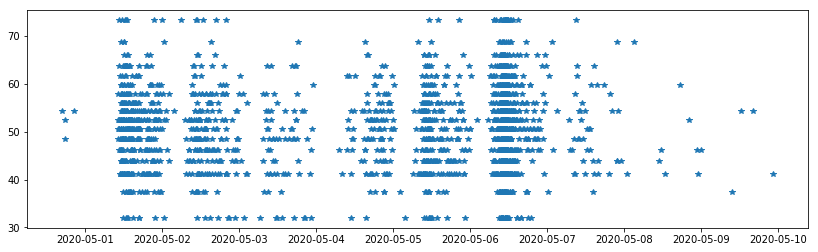

In [4]:
# example plot of data
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(rawdata['Slaap_tot_T'], '*')

In [5]:
# check questionnaire variable names
for c in rawdata.columns:
    print(c)

id
include
reason_exclusion
submitdate
lastpage
startlanguage
startdate
datestamp
IC
Leeftijd
Geslacht
Geslacht_other
Beroep
Beroepssituatie
Beroepssituatie_other
Werksector
Werksector2
Contact
Thuissamenstelling_SQ001
Thuissamenstelling_SQ002
Thuissamenstelling_SQ003
Thuissamenstelling_SQ004
Hulp
Scholingsgraad
Nationaliteit
Verblijfplaats
Woonomgeving
Buitenruimte
WoonSubj_WoonSubj
Lichamelijk
LichBehandeling
Mentaal
PsychBehandeling
Symptomen
Geschiedenis
Diagnose
Risico
Bezorgdheid
Verspreiding
richtlijnen_richtlijn1
richtlijnen_richtlijn2
richtlijnen_richtlijn3
richtlijnen_richtlijn4
MoeiteGedrag_MoeiteGedrag1
MoeiteGedrag_MoeiteGedrag2
MoeiteGedrag_MoeiteGedrag3
MoeiteGedrag_MoeiteGedrag4
VolhoudenGedrag_VolhoudenGedrag1
VolhoudenGedrag_VolhoudenGedrag2
VolhoudenGedrag_VolhoudenGedrag3
VolhoudenGedrag_VolhoudenGedrag4
Steun_Steun
Determinanten_EigEff1
Determinanten_EigEff2
Determinanten_EigEff3
Determinanten_UitkV1
Determinanten_UitkV2
Determinanten_UitkV3
Determinanten_RisicoP1


### Analysis

In [6]:
# select data for correlations
df4corr = rawdata
# compute correlations
dfcorr = df4corr.corr(method='spearman')
#select the highest correlations
dfcorr4plot = dfcorr#[np.abs(dfcorr)>0.6]

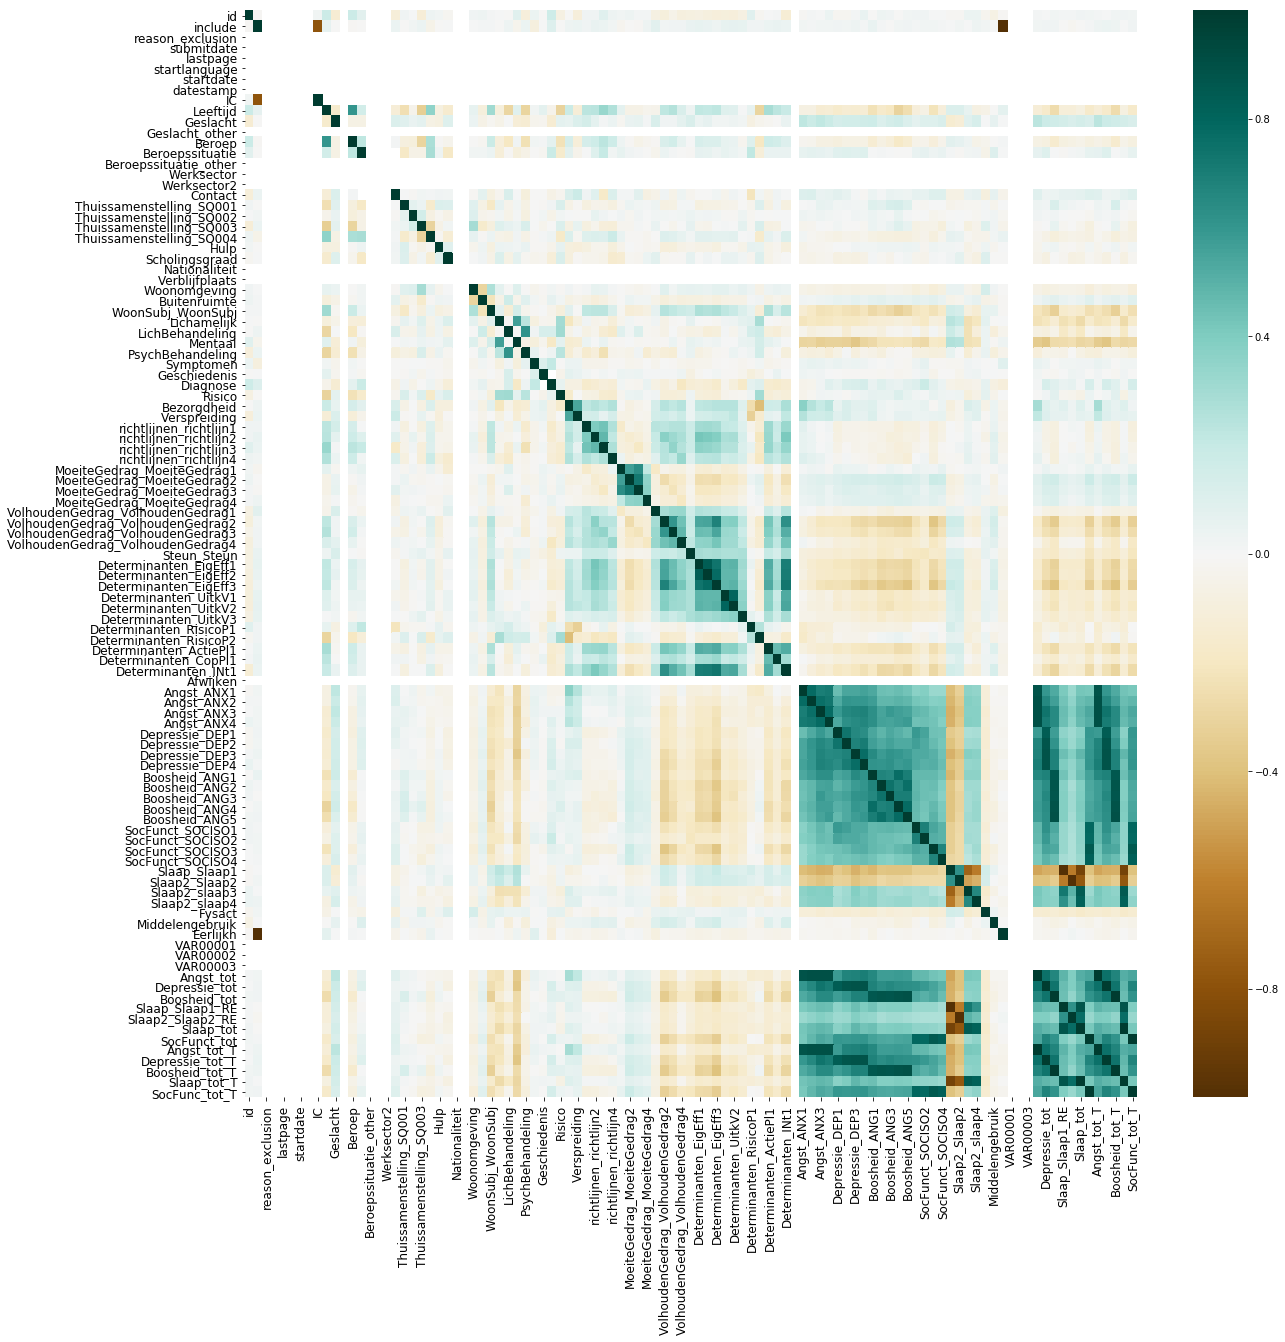

In [7]:
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(dfcorr4plot, ax=ax, cmap='BrBG', annot=False, vmin=-1, vmax=1, )
ax.tick_params(labelsize='large')

## Motivation data
Data from Joachim Waterschoot at FPPW

In [8]:
data_raw_motiv = pd.read_csv('../data/raw/social/dataset_coronacrisis_laatsteversie_stat_JWaterschoot.csv')

# # create time stamps of data
for ind, val in enumerate(data_raw_motiv['StartDate']):
    if val[1]=='/': #correct for bad readings
        data_raw_motiv.loc[ind, 'StartDate'] = '0'+data_raw_motiv.loc[ind, 'StartDate']
data_raw_motiv.StartDate = pd.to_datetime(data_raw_motiv['StartDate'], format='%m/%d/%Y')
# set values to numeric where possible
for c  in data_raw_motiv.columns[1:]:
    try:
        data_raw_motiv[c] = pd.to_numeric(data_raw_motiv[c], errors='coerce')
    except:
        pass

In [9]:
corr_motiv = data_raw_motiv.corr(method='spearman')

Text(0.5, 1.0, 'Spearman correlation matrix\nCOVID-19 crisis motivation data')

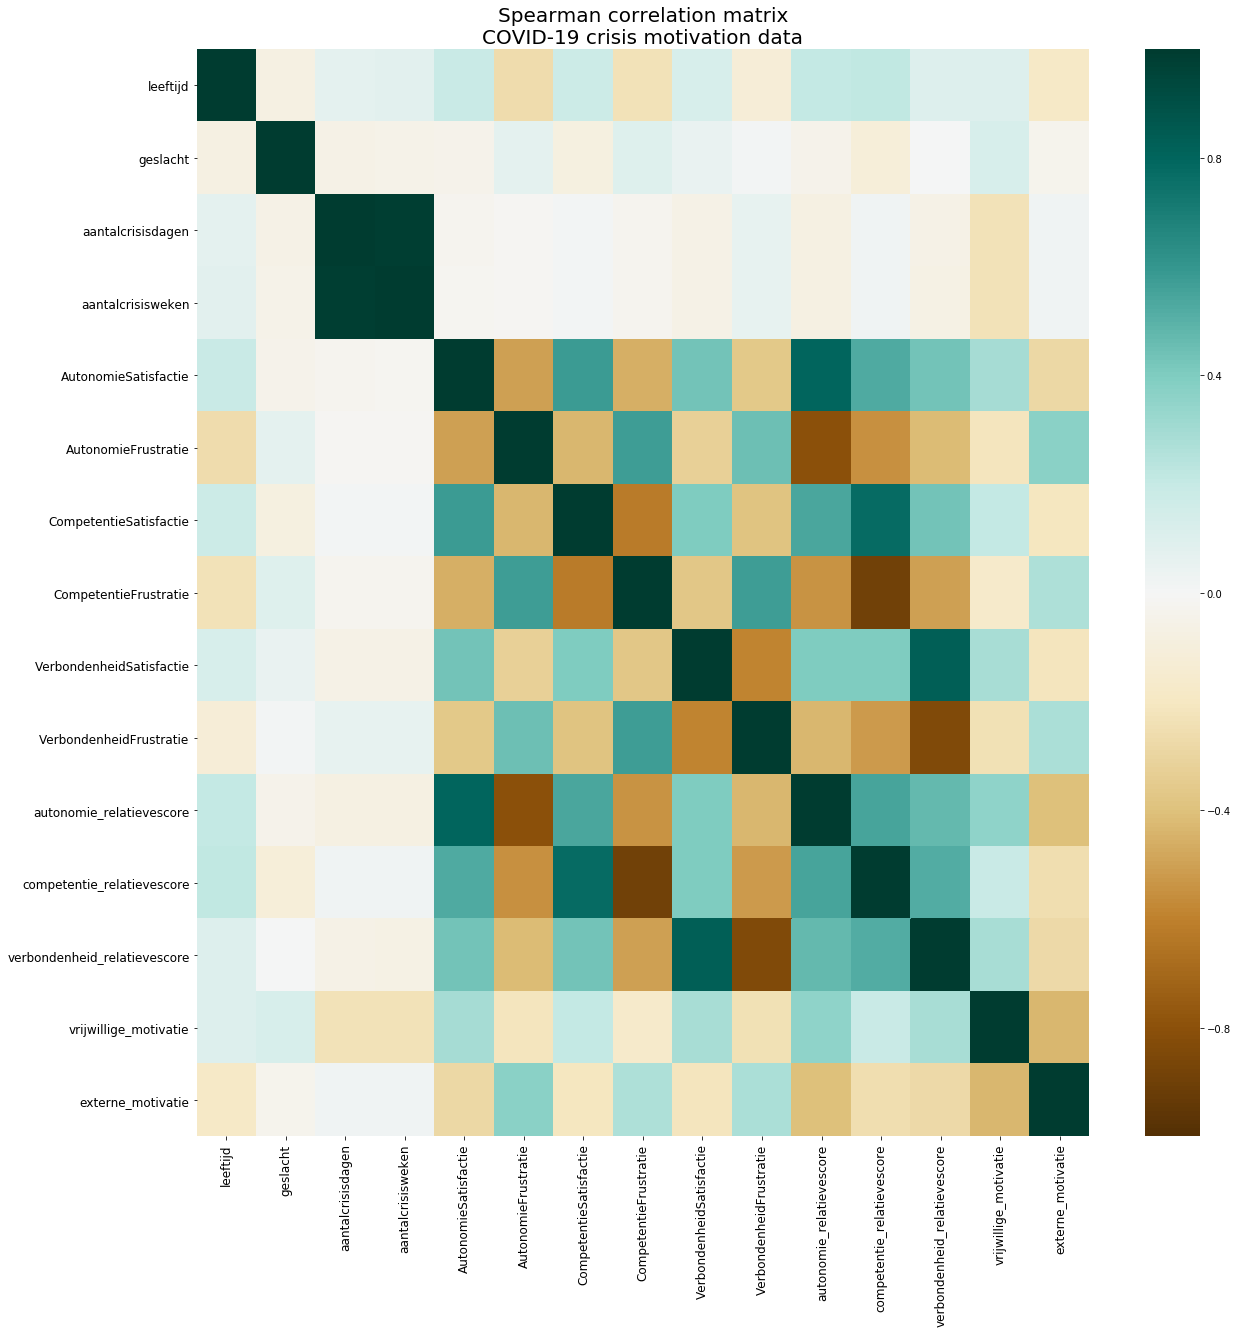

In [10]:
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(corr_motiv, ax=ax, cmap='BrBG', annot=False, vmin=-1, vmax=1, )
ax.tick_params(labelsize='large')
ax.set_title('Spearman correlation matrix\nCOVID-19 crisis motivation data', fontsize=20)

In [11]:
# histogram of motivation in every survey date(sd)
# empty list
sd_hist = []
# variable to check
var2check = 'vrijwillige_motivatie'
for sd in np.unique(data_raw_motiv.StartDate):
    sd_data = data_raw_motiv.loc[data_raw_motiv.StartDate==sd, var2check]
    sd_hist.append(np.histogram(sd_data[~np.isnan(sd_data)], np.linspace(0,5,11, endpoint=True))[0]) #ignore NaNs

In [16]:
sd_array = np.array(sd_hist)
sd_norm = sd_array / sd_array.sum(axis=1, keepdims=True)

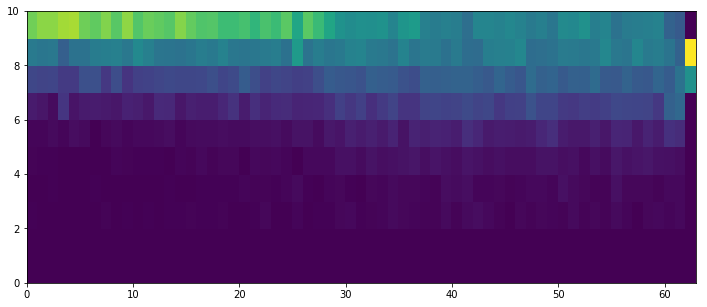

In [20]:
fig, ax = plt.subplots(figsize=(12,5))
ax.pcolor(np.transpose(sd_norm),)
ax.set_yticklabels()

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(data_raw_motiv.StartDate, data_raw_motiv.vrijwillige_motivatie, '*')

### Next steps
*Summary of the meeting with Joachim on 6th of August 2020*:
* Joachim's analysis pointed out that voluntary motivation mostly showed increases and decreases paired with government announcements, or simply significant events (such as the start of the Easter holidays). 
* He mentioned that the most illustrative variable is the satisfaction (and frustration) in terms of the people's needs and the restrictions thereon, imposed by confinement measures.
* this is all very interesting looking back on this period, but how to use this for predictions in the future (calculating this satisfaction and relating it to motivation) is not clear yet (Joachim would send some information on the theoretical psychological models, yet quantification also does not occur there presumably (yet perhaps Google Analytics data can help there)
* or, for simply starting and estimating a value, a short way would be to get a factor for restriction obedience based on the voluntary motivation, which in turn could be estimated from the confinement time length